In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("features_for_ml.csv")
print(df.head())
print(df['genre'].value_counts())

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -196.944473  31.251274 -47.126839  31.020103 -23.601799  18.450792   
1 -202.938614  27.224052 -43.082767  38.410809 -27.631262  18.478142   
2 -211.414749  22.232466 -39.514149  40.834213 -19.209150  23.927193   
3 -195.740265  37.053097 -41.482414  28.398323 -29.919754  17.769850   
4 -183.316055  39.364349 -42.387035  28.520182 -30.673475  15.789607   

      mfcc_7     mfcc_8     mfcc_9    mfcc_10  ...  chroma_10  chroma_11  \
0 -29.242361  19.948065 -25.138317  13.994640  ...   0.455007   0.416221   
1 -27.819164  20.353235 -21.784822  20.549713  ...   0.480691   0.457492   
2 -27.637388  18.635292 -24.474279  15.034540  ...   0.481985   0.498698   
3 -26.777910  19.977528 -23.284115  15.929207  ...   0.488013   0.475795   
4 -27.567493  20.305479 -27.498960  17.030983  ...   0.391098   0.486959   

   chroma_12       zcr      rmse       tempo  spec_centroid  spec_bandwidth  \
0   0.408294  0.276262  0.03403

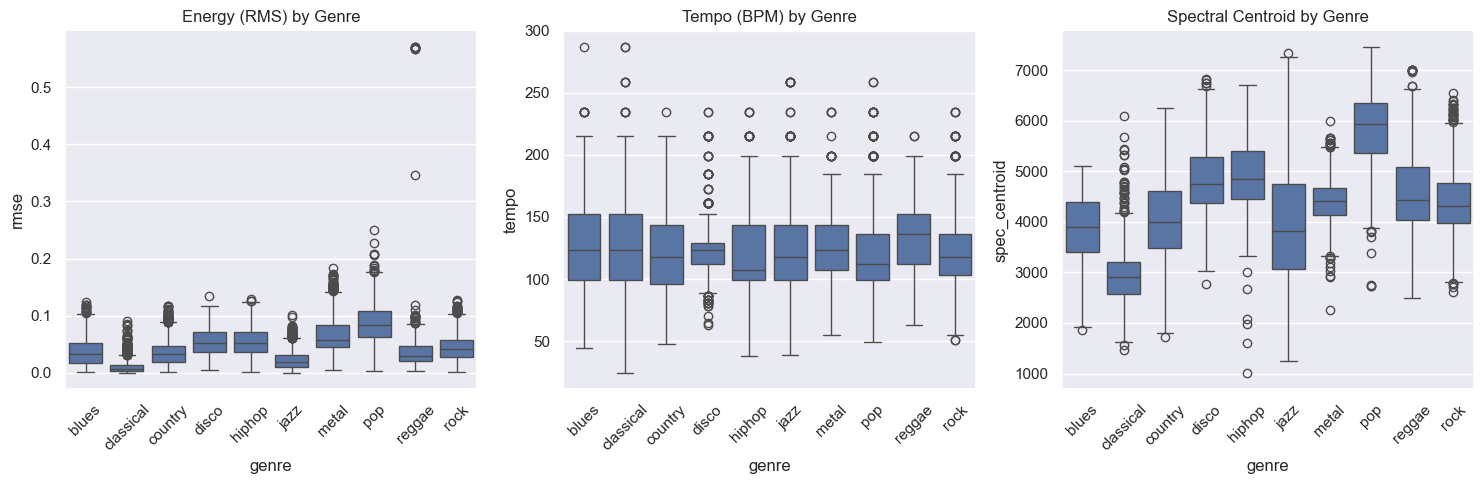

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(x='genre', y='rmse', data=df)
plt.xticks(rotation=45)
plt.title("Energy (RMS) by Genre")

plt.subplot(1,3,2)
sns.boxplot(x='genre', y='tempo', data=df)
plt.xticks(rotation=45)
plt.title("Tempo (BPM) by Genre")

plt.subplot(1,3,3)
sns.boxplot(x='genre', y='spec_centroid', data=df)
plt.xticks(rotation=45)
plt.title("Spectral Centroid by Genre")

plt.tight_layout()
plt.show()


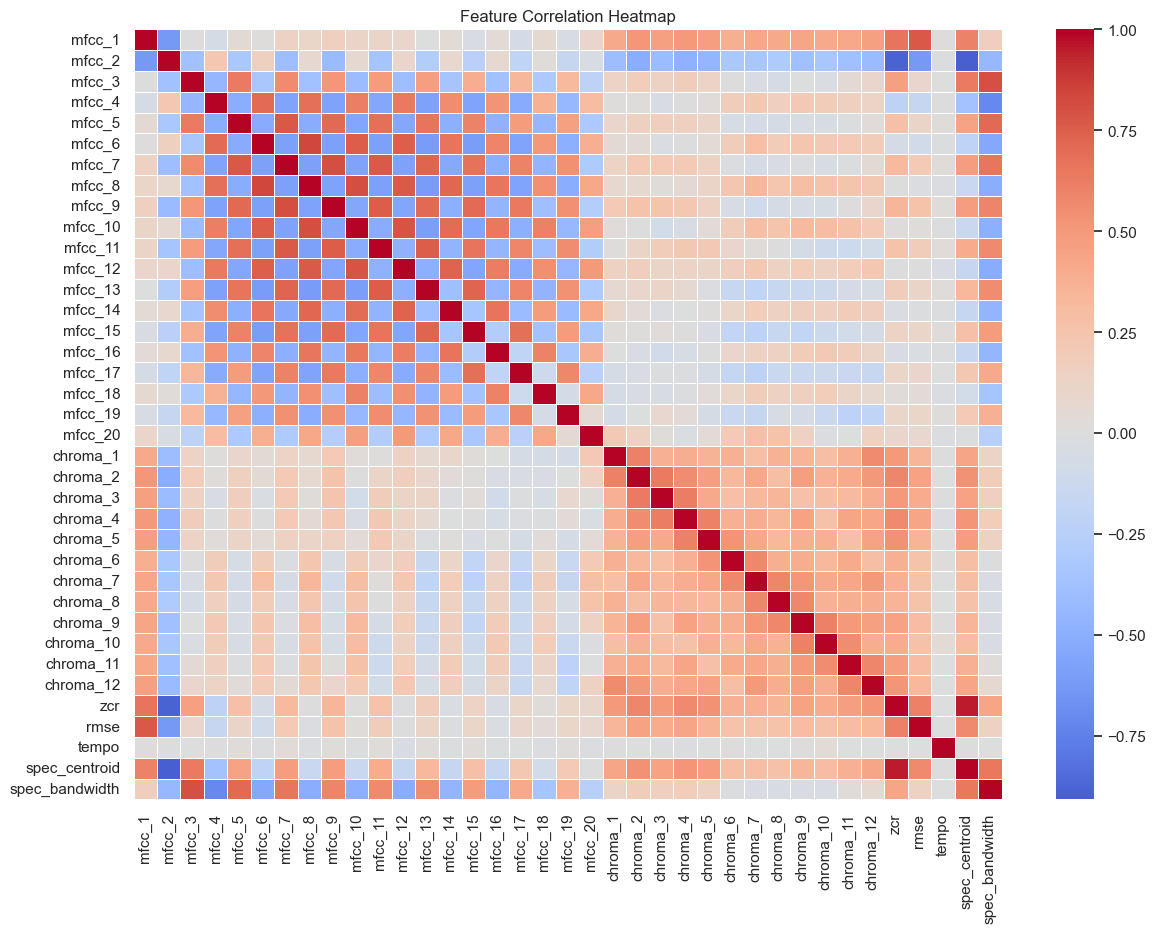

In [19]:
plt.figure(figsize=(14,10))
corr = df.drop(columns=['genre','filename']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


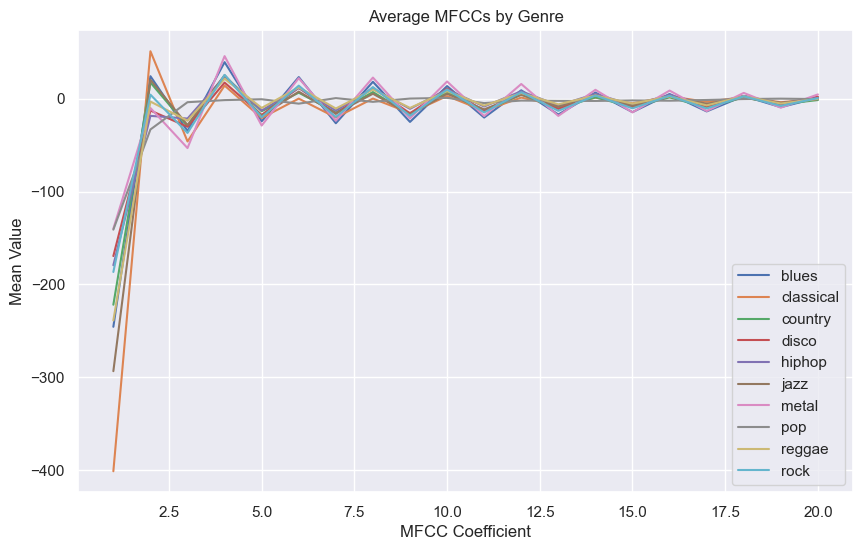

In [20]:
import numpy as np

mfcc_cols = [f"mfcc_{i+1}" for i in range(20)]

plt.figure(figsize=(10,6))
for genre in df['genre'].unique():
    mfcc_means = df[df['genre'] == genre][mfcc_cols].mean()
    plt.plot(range(1, 21), mfcc_means, label=genre)

plt.title("Average MFCCs by Genre")
plt.xlabel("MFCC Coefficient")
plt.ylabel("Mean Value")
plt.legend()
plt.show()


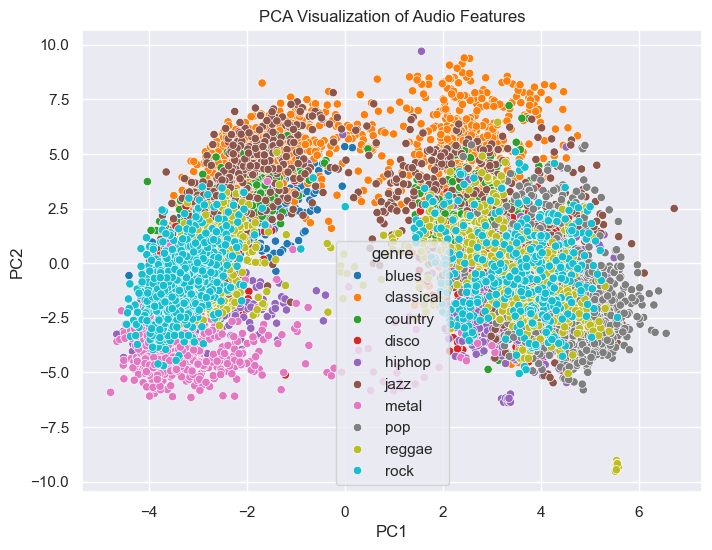

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['genre','filename'])
y = df['genre']

# Chuẩn hoá dữ liệu
X_scaled = StandardScaler().fit_transform(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10')
plt.title("PCA Visualization of Audio Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


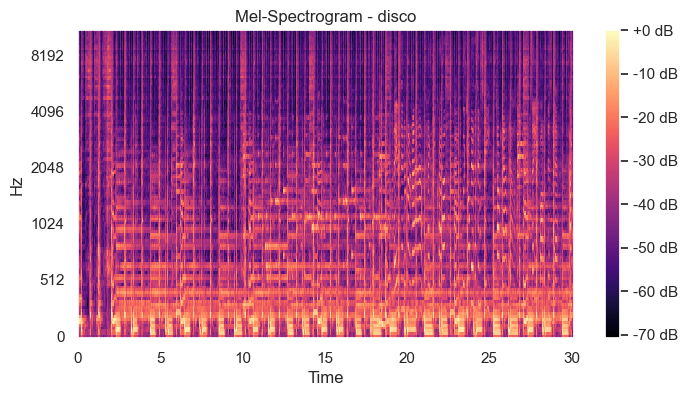

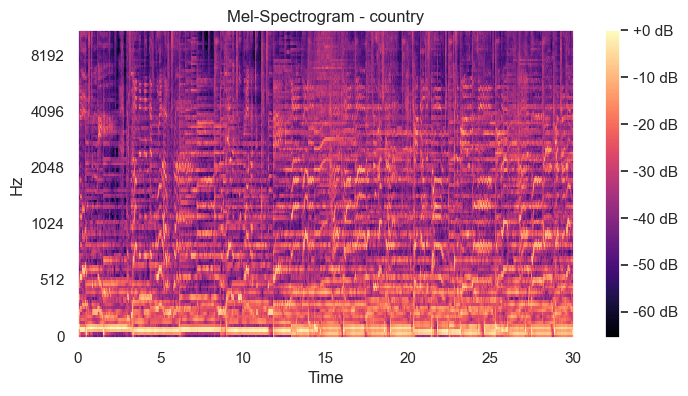

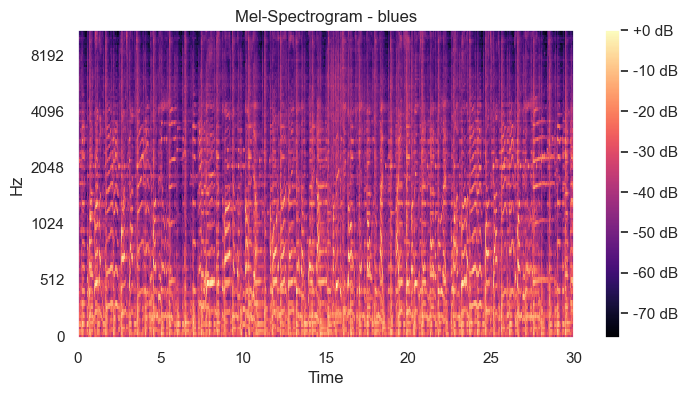

In [22]:
import librosa.display
import random, os

for genre in random.sample(list(df['genre'].unique()), 3):
    sample_file = df[df['genre'] == genre]['filename'].iloc[0]
    file_path = os.path.join("GTZAN", genre, sample_file)
    y, sr = librosa.load(file_path, sr=22050)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(8,4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel-Spectrogram - {genre}")
    plt.show()


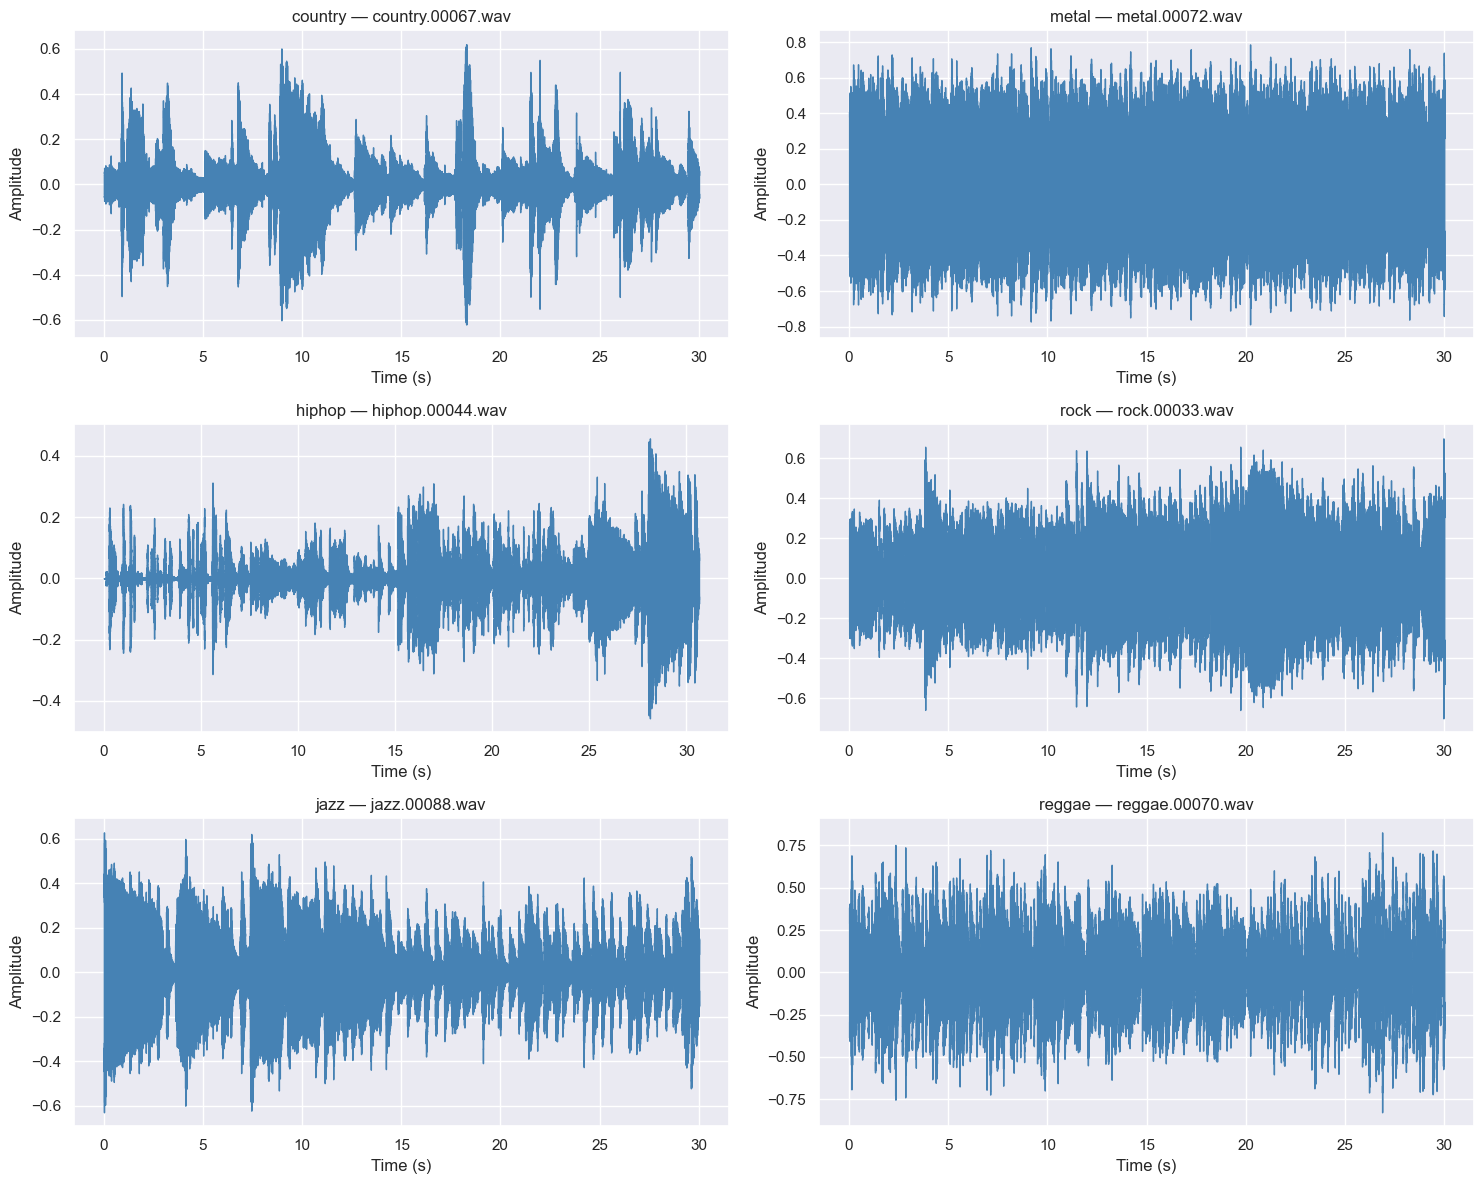

In [23]:
genres = [g for g in os.listdir("GTZAN") if os.path.isdir(os.path.join("GTZAN", g))]

plt.figure(figsize=(15, 12))

for i, genre in enumerate(random.sample(genres, 6)):  # lấy 6 genre ngẫu nhiên
    genre_dir = os.path.join("GTZAN", genre)
    wav_files = [f for f in os.listdir(genre_dir) if f.endswith('.wav')]
    sample_file = random.choice(wav_files)
    file_path = os.path.join(genre_dir, sample_file)

    # Load âm thanh
    y, sr = librosa.load(file_path, sr=22050, mono=True)

    # Vẽ waveplot
    plt.subplot(3, 2, i + 1)
    librosa.display.waveshow(y, sr=sr, color='steelblue')
    plt.title(f"{genre} — {sample_file}", fontsize=12)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [24]:
print("Columns containing missing values",list(df.columns[df.isnull().any()]))


Columns containing missing values []


In [25]:
from sklearn.preprocessing import LabelEncoder

converter = LabelEncoder()
y = converter.fit_transform(df['genre'])
print(y)
print(converter.classes_)


[0 0 0 ... 9 9 9]
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 6986
Test samples: 2995


Training set score: 0.931
Test set score: 0.823
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       300
           1       0.84      0.93      0.88       300
           2       0.73      0.71      0.72       299
           3       0.74      0.85      0.79       300
           4       0.83      0.88      0.85       299
           5       0.81      0.71      0.76       297
           6       0.93      0.94      0.94       300
           7       0.91      0.82      0.86       300
           8       0.86      0.83      0.84       300
           9       0.83      0.67      0.74       300

    accuracy                           0.82      2995
   macro avg       0.83      0.82      0.82      2995
weighted avg       0.83      0.82      0.82      2995



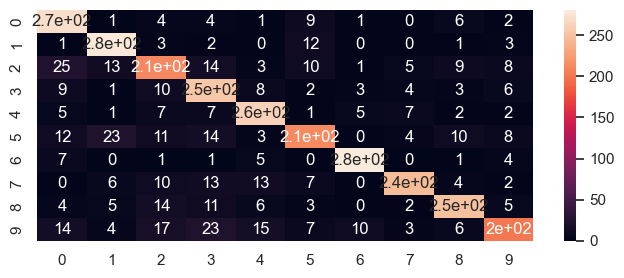

In [39]:
# Applying K nearest Neighbour algorithm to predict the results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test, y_pred))

Training set accuracy: 0.999
Test set accuracy: 0.842


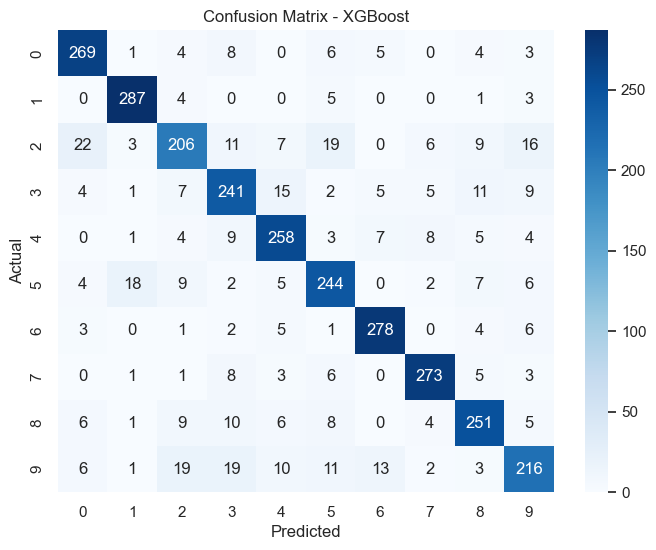

              precision    recall  f1-score   support

       blues       0.86      0.90      0.88       300
   classical       0.91      0.96      0.93       300
     country       0.78      0.69      0.73       299
       disco       0.78      0.80      0.79       300
      hiphop       0.83      0.86      0.85       299
        jazz       0.80      0.82      0.81       297
       metal       0.90      0.93      0.91       300
         pop       0.91      0.91      0.91       300
      reggae       0.84      0.84      0.84       300
        rock       0.80      0.72      0.76       300

    accuracy                           0.84      2995
   macro avg       0.84      0.84      0.84      2995
weighted avg       0.84      0.84      0.84      2995



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf2 = XGBClassifier(
    n_estimators=200,      
    learning_rate=0.1,     
    max_depth=6,            
    subsample=0.8,           
    colsample_bytree=0.75,    
    random_state=42,
    eval_metric='mlogloss'
)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

train_acc = accuracy_score(y_train, clf2.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training set accuracy: {train_acc:.3f}")
print(f"Test set accuracy: {test_acc:.3f}")

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred, target_names=converter.classes_))


Ensemble (Voting) Accuracy: 0.888


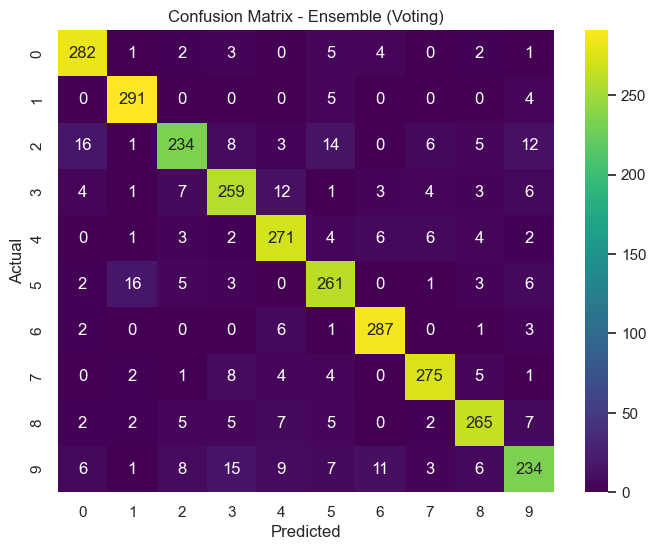

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       300
           1       0.92      0.97      0.94       300
           2       0.88      0.78      0.83       299
           3       0.85      0.86      0.86       300
           4       0.87      0.91      0.89       299
           5       0.85      0.88      0.86       297
           6       0.92      0.96      0.94       300
           7       0.93      0.92      0.92       300
           8       0.90      0.88      0.89       300
           9       0.85      0.78      0.81       300

    accuracy                           0.89      2995
   macro avg       0.89      0.89      0.89      2995
weighted avg       0.89      0.89      0.89      2995



In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC

model1 = RandomForestClassifier(n_estimators=200, random_state=42)
model2 = XGBClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.75, eval_metric='mlogloss',
    random_state=42
)
model3 = KNeighborsClassifier(n_neighbors=3)
model4 = SVC(probability=True, kernel='rbf', C=5, gamma='scale', random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', model1),
        ('xgb', model2),
        ('knn', model3),
        ('svm', model4)
    ],
    voting='soft'  
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Ensemble (Voting) Accuracy: {acc:.3f}")

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Ensemble (Voting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))
